# Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Loading Data

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv")#, header=None, names=col_names)

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Selection

In [4]:
#split dataset in features and target variable
X = pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] # Features
y = pima.Outcome # Target variable

# Splitting Data

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Building Decision Tree Model

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating Model

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6277056277056277


# Visualizing Decision Trees

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


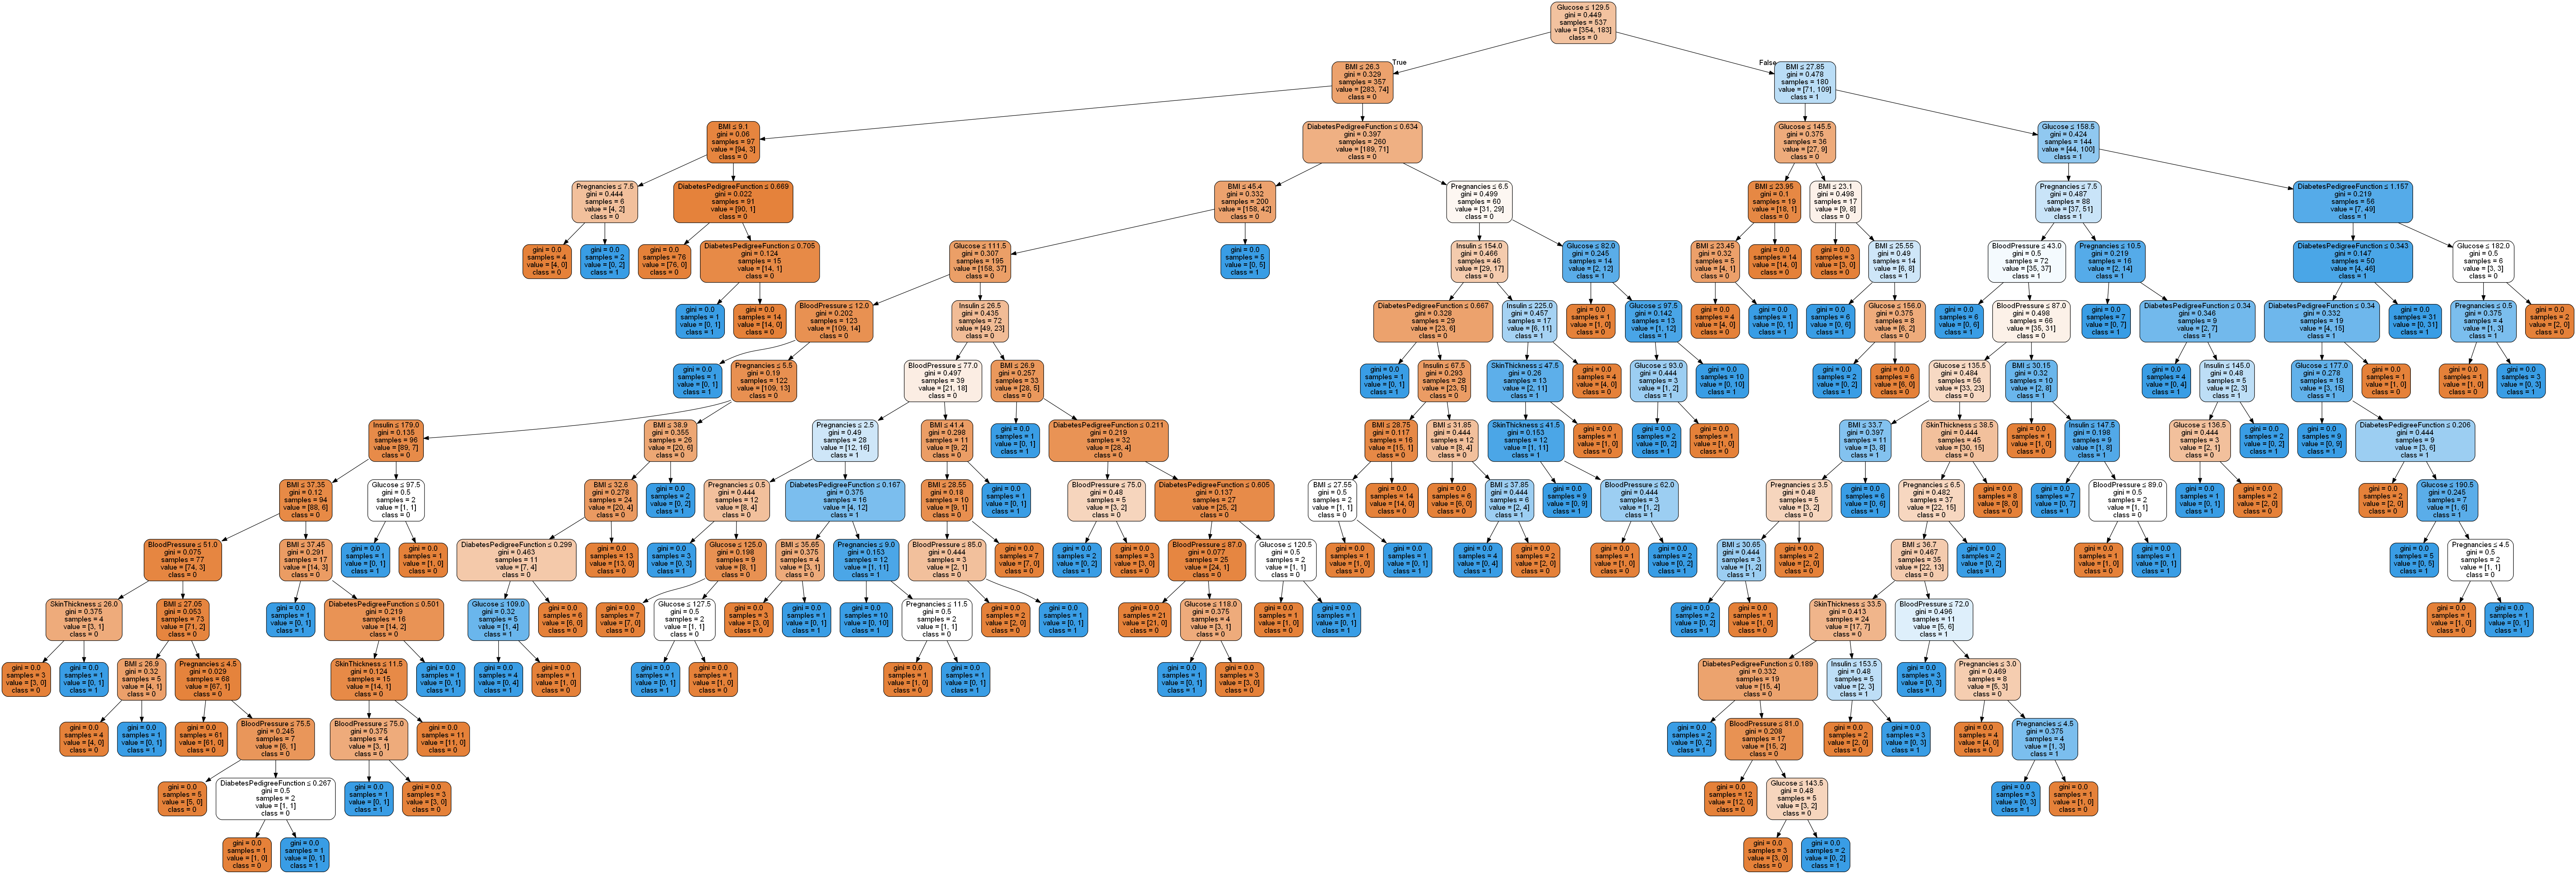

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Optimizing Decision Tree Performance

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


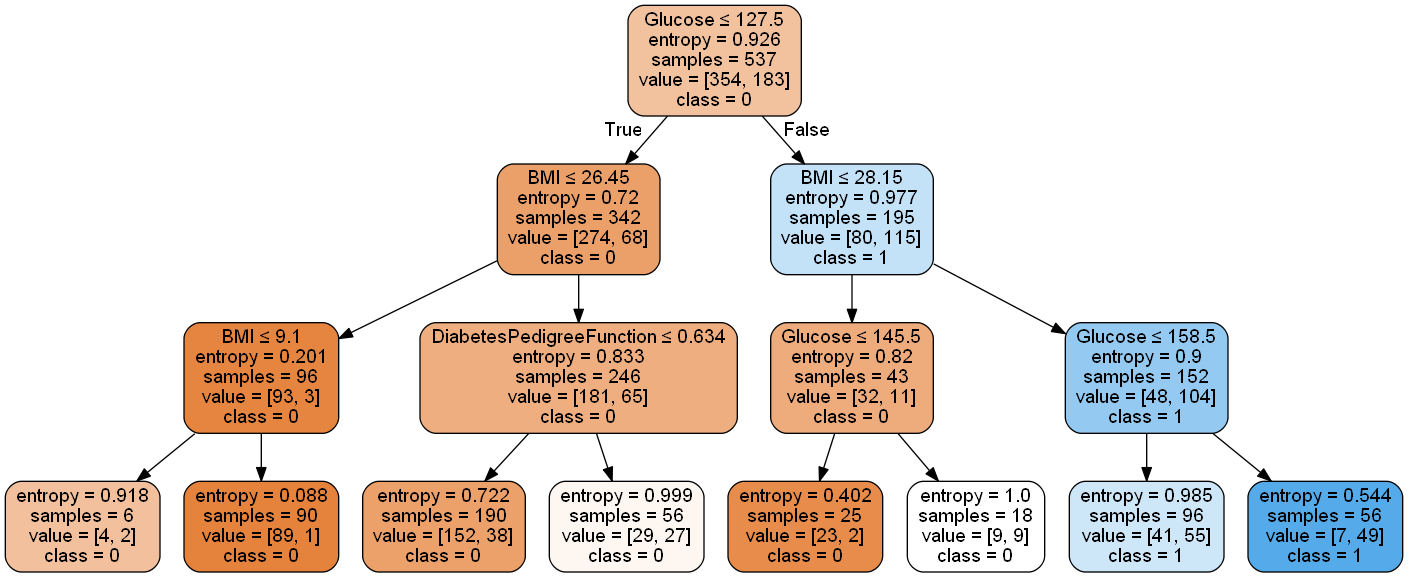

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Get parameters for DecisionTreeClassifier

In [12]:
print(DecisionTreeClassifier().get_params())

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


## Using Interact widgets

In [29]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [34]:
def Decision(criterion,max_depth):
    if criterion is not None:
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        dot_data = StringIO()
        export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],
                class_names=['0','1'])
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        graph.write_png('diabetes1.png')
        Image(graph.create_png())
        print(max_depth)
        print(criterion)
        
        
interact(Decision,criterion=["gini","entropy"],max_depth=widgets.IntSlider(min=2, max=20, step=1, value=4));        

interactive(children=(Dropdown(description='criterion', options=('gini', 'entropy'), value='gini'), IntSlider(…

# Pros

 * il n’est pas nécessaire de normaliser les colonnes
 * utilisé pour l’ingénierie des caractéristiques telles que la prédiction des valeurs manquantes
 * faciles à interpréter et à visualiser

# Cons

* La faible variation des données peut entraîner la différence dans Decision Tree, ce qui peut être réduit par des algorithmes d’ensachage et d’amplification
* Les arbres de décision sont instables et ont tendance à overfiter. Être instable signifie qu'il suffit parfois d'ajouter ou de supprimer quelques exemples d'apprentissage, ou de modifier légèrement leurs propriétés, pour changer radicalement la structure de l'arbre

# Conclusion

Au cours de ce TP nous avons pris comment fonctionne Decision Tree tels que  :

   
   * la construction modèle de l’arbre de décision
   * la visualisation et l’évaluation sur dataset diabetes 
   * la manupilation Interact widgets avec l’arbre de décision